In [76]:
from urllib.request import urlopen
import json
import re
from urllib.parse import quote
import pandas as pd
from pandas.io.json import json_normalize

n = 2500


query = "http://www.wikia.com/api/v1/Wikis/List?expand=1&limit="+str(n)+"&batch=1"
response = urlopen(query)
wikisource = response.read()
data = json.loads(wikisource)
#print(data)  

def searchForWiki(hub, n):
    querySearch = "http://www.wikia.com/api/v1/Wikis/ByString?expand=1&string="+str(hub)+"&limit="+str(n)+"&batch=1&includeDomain=true"
    response = urlopen(querySearch)
    data = json.loads(response.read())
    return pd.DataFrame(data['items']) 
    

df = pd.DataFrame(data['items'])
fullDataSet = df
for hub in set(df["hub"]):
    df2 = searchForWiki(hub, n)
    fullDataSet = fullDataSet.append(df2)
    print("-----"+ hub)
    print(len(df2))
    
print("__________-_-_-_-___________")
print(len(fullDataSet))
fullDataSet = fullDataSet.drop_duplicates(subset="id")
fullDataSet = fullDataSet.reset_index()
print(len(fullDataSet))
fullDataSet

-----Lifestyle
30
-----Movies
250
-----Books
250
-----Comics
250
-----TV
250
-----Other
250
-----Games
250
-----Music
250
__________-_-_-_-___________
2030
2019


,index,creation_date,desc,domain,flags,founding_user_id,headline,hub,id,image,...,language,name,original_dimensions,stats,title,topUsers,topic,url,wam_score,wordmark
0,0,2013-02-14 11:25:40,"""Old School RuneScape"" is Jagex's official ter...",oldschoolrunescape.wikia.com,[],1649337,Welcome to the Old School RuneScape Wiki,Games,691244,https://images.wikia.nocookie.net/__cb20170706...,...,en,Old School RuneScape Wiki,"{'width': 480, 'height': 320}","{'edits': 7425610, 'articles': 19813, 'pages':...",Old School RuneScape Wiki,"[3044102, 1759647, 4097547, 26578522, 8306, 50...",Gaming,http://oldschoolrunescape.wikia.com,95.5018,https://vignette.wikia.nocookie.net/2007scape/...
1,1,2005-02-07 06:40:52,Created and maintained by the Fallout communit...,fallout.wikia.com,[],0,Nukapedia - The Fallout Wiki,Games,3035,https://images.wikia.nocookie.net/__cb20170307...,...,en,Fallout Wiki,"{'width': 1751, 'height': 1337}","{'edits': 2925242, 'articles': 27381, 'pages':...",Fallout Wiki,"[3183960, 27868532, 3076045, 31775388, 4286974...",Gaming,http://fallout.wikia.com,99.7960,https://vignette.wikia.nocookie.net/fallout/im...
2,2,2009-06-16 17:10:14,Red Dead Wiki is a community-built site about ...,reddead.wikia.com,[],131372,Welcome to the Red Dead Wiki!,Games,30404,https://images.wikia.nocookie.net/__cb20161102...,...,en,Red Dead Wiki,"{'width': 480, 'height': 360}","{'edits': 334118, 'articles': 2621, 'pages': 8...",Red Dead Wiki,"[1376364, 28191207, 4090850, 33558234, 2735137...",Gaming,http://reddead.wikia.com,99.4347,https://vignette.wikia.nocookie.net/reddeadred...
3,3,2006-03-29 02:45:59,"The Elder Scrolls Wiki consists of over 60,000...",elderscrolls.wikia.com,[],0,The Elder Scrolls Wiki,Games,1706,https://images.wikia.nocookie.net/__cb20170307...,...,en,Elder Scrolls,"{'width': 1800, 'height': 1565}","{'edits': 2776470, 'articles': 61679, 'pages':...",Elder Scrolls,"[32045548, 25356303, 17401442, 30169600, 26074...",Gaming,http://elderscrolls.wikia.com,99.5703,https://vignette4.wikia.nocookie.net/elderscro...
4,4,2005-05-26 11:44:29,Yu-Gi-Oh! Wikia is a database on Konami's Yu-G...,yugioh.wikia.com,[],310,Yu-Gi-Oh! Wikia,Games,410,https://images.wikia.nocookie.net/__cb20161102...,...,en,Yu-Gi-Oh!,"{'width': 320, 'height': 320}","{'edits': 3993815, 'articles': 108240, 'pages'...",Yu-Gi-Oh!,"[3040170, 4129195, 3545725, 5452442, 3564254, ...",Anime,http://yugioh.wikia.com,99.4536,https://img3.wikia.nocookie.net/__cb2014041821...
5,5,2004-11-11 23:33:14,Wookieepedia is an online encyclopedia that co...,starwars.wikia.com,[],2041,"Wookieepedia, the Star Wars Wiki",Movies,147,https://images.wikia.nocookie.net/__cb20061211...,...,en,Wookieepedia,"{'width': 1042, 'height': 1042}","{'edits': 7941654, 'articles': 145786, 'pages'...",Wookieepedia,"[24962224, 27768064, 24165583, 7090787, 309238...",Entertainment,http://starwars.wikia.com,99.7613,https://img3.wikia.nocookie.net/__cb2015010101...
6,6,2012-06-01 18:53:17,Warframe Wiki is a player supported encycloped...,warframe.fandom.com,[],5156670,Discover the mysteries of the Tenno.,Games,544934,https://images.wikia.nocookie.net/__cb20161102...,...,en,WARFRAME Wiki,"{'width': 1920, 'height': 1145}","{'edits': 1845700, 'articles': 4566, 'pages': ...",WARFRAME Wiki,"[25254386, 34103815, 14475, 26061294, 15339176...",Gaming,https://warframe.fandom.com,99.7302,https://vignette4.wikia.nocookie.net/warframe/...
7,7,2005-04-08 07:30:06,"Started in April of 2005, the RuneScape Wiki's...",runescape.fandom.com,[],2648,The RuneScape Wiki,Games,304,https://images.wikia.nocookie.net/__cb20181004...,...,en,RuneScape Wiki,"{'width': 192, 'height': 192}","{'edits': 23434134, 'articles': 43969, 'pages'...",RuneScape Wiki,"[3044102, 19402885, 32232648, 9852177, 3373504...",Gaming,https://runescape.fandom.com,90.7248,https://vignette.wikia.nocookie.net/runescape2...
8,8,2005-07-04 03:57:32,Harry Potter Wiki is a collaborative knowledge...,harrypotter.wikia.com,[],3676,Harry Potter Wiki,Books,509,https://imag

In [230]:
from fa2 import ForceAtlas2
# Set layout
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1,

                          # Performance
                          jitterTolerance=0.5,  #1 # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=0.01, #0.01
                          strongGravityMode=False, #False
                          gravity=2, #15

                          # Log
                          verbose=True)


# Calculate Positions
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=4000)

100%|██████████| 4000/4000 [00:09<00:00, 359.44it/s]

BarnesHut Approximation  took  2.13  seconds
Repulsion forces  took  6.38  seconds
Gravitational forces  took  0.11  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.57  seconds


In [207]:
import collections
import itertools
import networkx as nx
import matplotlib.pyplot as plt

topUsers = []
topUsers = [x for x in df["topUsers"]]
topUsers = list(itertools.chain.from_iterable(topUsers))

counter=collections.Counter(topUsers)
#print(counter)
#print(counter.values())
#print(counter.keys())
print(counter.most_common(7))
# 123+5+2+5

G = nx.DiGraph()
for wiki in df["name"]:
    G.add_node(wiki)
    

user1= ""
user2= ""
for user in counter.most_common(111):
    user = user[0]
    for k, v in df.T.items():
        #print(k)
        #print(v["topUsers"])
        if user in v["topUsers"] and user1 == "" and user1 == "":
            user1 = v["name"]
        elif user in v["topUsers"] and user2 == "" and user1 != "":
            user2 = v["name"]
            if user1 != user2:
                G.add_edge(user1, user2)
            #print(user1, user2)
            user1 = ""
            user2 = ""
            


[(30169600, 7), (3183460, 4), (1672596, 3), (27345308, 3), (27640688, 3), (5279400, 3), (4320408, 3)]


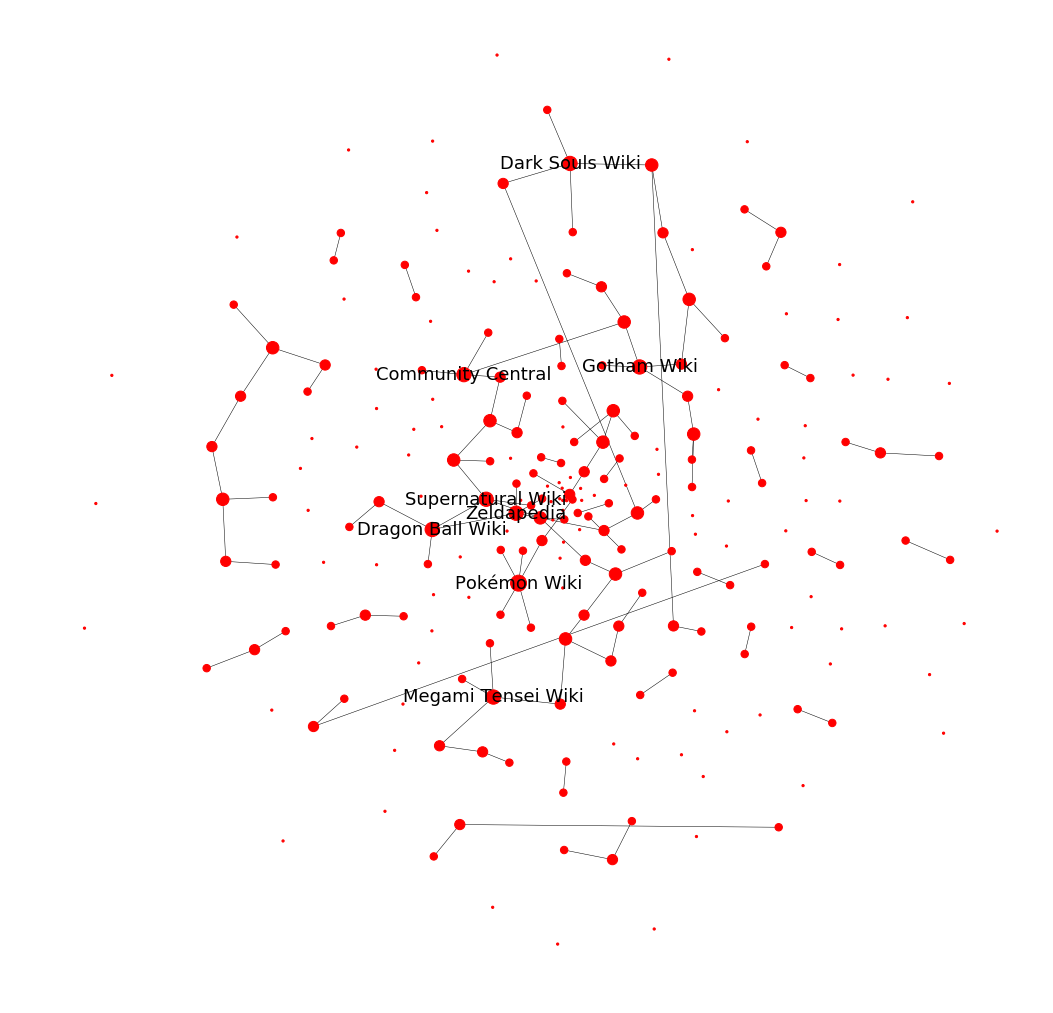

In [236]:
plt.figure(figsize=(18, 18))             
node_size = [(G.degree(node, weight='weight')*50)+5 for node in G.nodes()]  

labels = {}    
for node in G.nodes():
    if G.degree(node, weight='weight')*50 > 150:
        #set the node name as the key and the label as its value 
        labels[node] = node

node_label = [node for node in G.nodes() ]
nx.draw_networkx_nodes(G.to_undirected(), positions, nodelist=G.nodes, node_size=node_size,cmap=plt.get_cmap('jet'))
nx.draw_networkx_edges(G.to_undirected(), positions, width=0.5, cmap=plt.get_cmap('jet'))
nx.draw_networkx_labels(G.to_undirected(), positions, labels=labels, font_size=18, font_color='k', font_weight='normal', alpha=2.0)
plt.axis('off')
plt.show()